# ¿Quién produce los alimentos que comemos?
### Análisis Exploratorio de Datos con Python (EDA)
### Priscilla Castro Blanco

#### Nombre y fuente del dataset seleccionado:
Who eats the food we grow, datos de la ONU
**Fuente:**  https://www.kaggle.com/dorbicycle/world-foodfeed-production

___

En el mundo actual, podría parecer que todos tenemos igual acceso a los recursos esenciales: internet, transporte, y alimentos. Sin embargo, el crecimiento acelerado de la población y la crisis climática están ampliando las desigualdades globales, afectando el acceso a estos recursos.

Uno de los factores más críticos es la disponibilidad de alimentos. Actualmente, la producción agrícola se divide entre alimentos para consumo humano y animal. Esta base de datos analiza dónde se producen y consumen estos alimentos, ofreciendo una oportunidad para mejorar su distribución y eficiencia.

Ante los desafíos futuros, es evidente que el sistema alimentario global no está preparado para sostener la creciente demanda proyectada para los próximos 25 años. Sin cambios significativos, corremos el riesgo de un colapso en la producción, lo que podría profundizar aún más las desigualdades entre naciones y comunidades.

Si quieres saber más sobre este tema, mira el siguiente video:



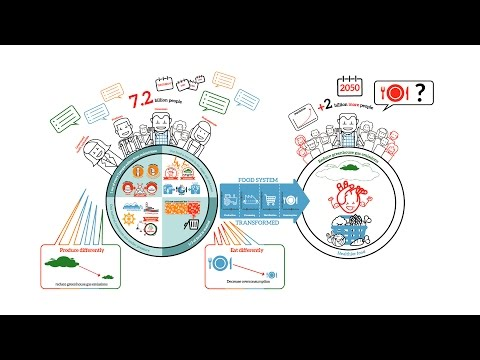

In [ ]:
from IPython.display import YouTubeVideo

# ID del video de YouTube
id_video = 'VcL3BQeteCc'

# Mostrar el video de YouTube
YouTubeVideo(id_video)



Los datos existentes en esta base de datos describen el tipo de alimento (consumo humano o animal) producido en alrededor de 245 países
y territorios.

En las columnas podremos encontrar los datos del lugar en el que se producen los alimentos (El área y país), así como su código específico. Con esto se muestra además la latitud y longitud, por lo tanto, se poseen datos *geográficos.*
Las demás columnas describen el tipo de alimento producido, y si es para consumo animal o humano. 
Finalmente, se muestran los datos de la producción de los alimentos a partr del año 1961, y hasta el año 2013. Es decir, son datos *temporales.*

### Preguntas a responder

Las preguntas que quiero responder al realizar este análisis de datos, son las siguientes:

- ¿Qué país(es) consume la mayor cantidad de alimentos en el mundo?

- ¿Qué país(es) genera la mayor cantidad de alimentos en el mundo?

- ¿Se produce más alimento para consumo humano, o para consumo animal?

### Respecto al análisis y visualización:
Me interesa identificar si existe una correlación entre los países que consumen la mayor cantidad de alimentos y las naciones de primer mundo, así como si los países que producen más alimentos tienden a ser de tercer mundo.

También busco determinar si la producción está más orientada al consumo humano o animal, y representarlo mediante un gráfico de barras para analizar las posibles causas detrás de esta tendencia.

Por último, si los datos lo permiten, me gustaría estudiar la evolución de la producción y consumo de alimentos a lo largo del tiempo, identificando momentos clave, como picos de producción vinculados a eventos específicos.




## Ingestión de los datos

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# Ingestión de los datos
food_data = pd.read_csv("FAO.csv", encoding="latin1")  

## Análisis estructural
Una vez que nos aseguramos que realizamos la ingestión de manera correcta, empezamos con el análisis estructural. Para esto simplemente revisamos las primeras 5 filas con la totalidad de las columnas para un primer entendimiento del set de datos. 

In [4]:
food_data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


Teniendo ya un entendimiento general del set de datos, realizamos otro análisis estructural para determinar la información que tenemos, la cantidad de datos y el uso de memoria.

In [5]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

Este documento contiene datos completos para cada columna, excepto en las columnas correspondientes a los años, que tienen 3,539 entradas menos. He decidido no eliminar estas columnas, ya que, aunque no están completas, el documento detalla que se incluyeron países que fueron creados después de que comenzó la recolección de datos, por lo que era imposible recolectar estos datos antes. 

Por otro lado, el uso de memoria parece estar bien. 

Por último, buscamos los valores nulos, para poder indentificar en dónde se encuentran:


In [6]:
mascaraNulos = food_data.isna()
mascaraNulos.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Análisis semántico

Primero hacemos una extracción de estadísticas básica sobre los datos

In [7]:
food_data.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


Debido a la cantidad en el "Area Code", parece que existen 276 áreas distintas en donde los alimentos son producidos. 


Volviendo al análisis semántico, y a las preguntas propuestas al principio, existe una pregunta que no podrá ser respondida:
-¿Qué país(es) consume la mayor cantidad de alimentos en el mundo?

Esto debido a que esta información no está especificada en el set de datos, por lo tanto, no es posible responderla en este momento. 
Las dos preguntas que quedan por responder son: 

- ¿Se produce más alimento para consumo humano, o para consumo animal?

- ¿Qué país(es) genera la mayor cantidad de alimentos en el mundo?


___


Vamos a responder la primera pregunta a continuación
### ¿Se produce más alimento para consumo humano, o para consumo animal?


In [11]:
# Filtrar filas donde el 'Element' es 'Food'
food_items = food_data[food_data['Element'] == 'Food']

# Filtrar filas donde el 'Element' es 'Feed'
feed_items = food_data[food_data['Element'] == 'Feed']

# Identificar las columnas de años
columns_years = [col for col in food_data.columns if col.startswith('Y')]

# Sumar las producciones para 'Food'
food_production = food_items[columns_years].sum().sum()

# Sumar las producciones para 'Feed'
feed_production = feed_items[columns_years].sum().sum()

print(f"Total producción de alimentos para humanos: {food_production}")
print(f"Total producción de alimentos para animales: {feed_production}")

# Comparar las producciones
if food_production > feed_production:
    print("Se produce más alimentos para humanos.")
elif feed_production > food_production:
    print("Se produce más alimentos para animales.")
else:
    print("La producción de alimentos para humanos y animales es igual.")

Total producción de alimentos para humanos: 291375363.0
Total producción de alimentos para animales: 87348711.0
Se produce más alimentos para humanos.


A continuación, vamos a tomar los valores de los elementos (Feed y Food), es decir, de la producción de alimentos para humanos y para animales del año 2000 en adelante, para graficar y observar la diferencia en la producción de ambos, además de ver su cambio a través del tiempo. 

In [12]:
#Vamos a agrupar todos los elementos por año. Para eso identificamos las columnas en donde se encuentra el año. 
columnas_año = [col for col in food_data.columns if col.startswith('Y2')]

#Creamos la tabla pivote con Element (Food y Feed como índice), los valores de las columnas de los años, y la suma de todos esos valores
pivote1 = pd.pivot_table(food_data, index = "Element", values = columnas_año, aggfunc="sum")
pivote1

,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Element,,,,,,,,,,,,,,
Feed,2105448.0,2145315.0,2130442.0,2144306.0,2265261.0,2231603.0,2216267.0,2253747.0,2366119.0,2279482.0,2300597.0,2455964.0,2423161,2608511
Food,7439587.0,7546602.0,7703775.0,7842758.0,8017541.0,8187739.0,8391566.0,8614041.0,8808645.0,8932409.0,9144475.0,9371838.0,9616184,9752737


Creamos el gráfico que muestra esta información

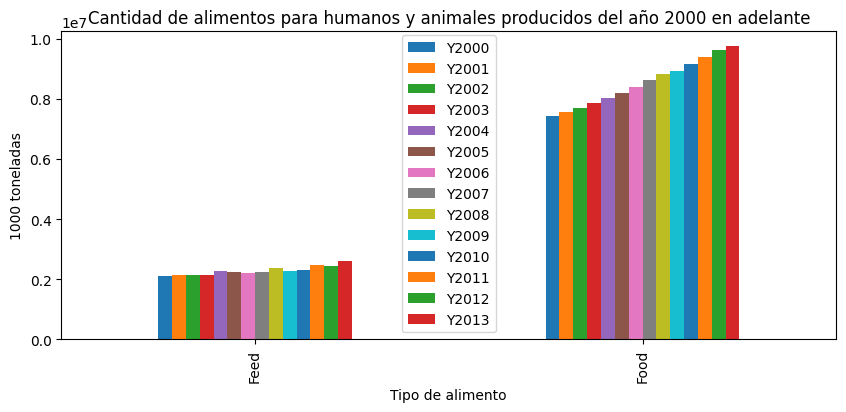

In [19]:
ax = pivote1.plot.bar(figsize=(10,4), title = "Cantidad de alimentos para humanos y animales producidos del año 2000 en adelante")
ax.set_xlabel("Tipo de alimento")
ax.set_ylabel("1000 toneladas")
plt.show()

#### Conclusión 1:

Se produce mayor cantidad de alimento para humanos, además, para los datos después del año 2000, se observa que la cantidad de alimento producido para humanos va aumentando (hasta el 2013), a diferencia del alimento para animales, que permanece relativamente constante 

___

Continuamos con la siguiente pregunta

### ¿Cuáles son los países con mayor producción de alimentos para humanos (food)?

In [20]:
# Filtrar filas donde el 'Element' es 'Food'
food_items = food_data[food_data['Element'] == 'Food']

# Identificar las columnas de años
columns_years = [col for col in food_data.columns if col.startswith('Y')]

# Sumar las producciones para cada país
produccion_por_pais_food = food_items.groupby('Area')[columns_years].sum()

# Calcular la producción total sumando a lo largo de los años
produccion_por_pais_food ['Total'] = produccion_por_pais_food.sum(axis=1)

# Ordenar por la producción total en orden descendente
produccion_por_pais_ordenado_food = produccion_por_pais_food.sort_values(by='Total', ascending=False)

# Mostrar los primeros 10 países
top_paises = produccion_por_pais_ordenado_food.head(10)
print(top_paises)


                             Y1961     Y1962     Y1963     Y1964     Y1965  \
Area                                                                         
China, mainland           421752.0  435337.0  424916.0  420137.0  474811.0   
India                     294341.0  302938.0  299645.0  309298.0  311222.0   
United States of America  324934.0  327778.0  329060.0  337165.0  340652.0   
Brazil                     71616.0   76420.0   79684.0   84811.0   88252.0   
Germany                   118159.0  122048.0  125453.0  127003.0  128292.0   
Japan                      97046.0  102022.0  107065.0  108955.0  111266.0   
Indonesia                  60962.0   63652.0   64415.0   69404.0   69215.0   
Italy                      83800.0   83298.0   88683.0   90109.0   92251.0   
France                     94396.0   97110.0   98196.0   99389.0   99252.0   
Nigeria                    40490.0   42072.0   43072.0   43977.0   44357.0   

                             Y1966     Y1967     Y1968     Y196

Para la producción de Food, los países que producen la mayor cantidad son China, India y Estados Unidos

Text(0, 0.5, '1000 toneladas')

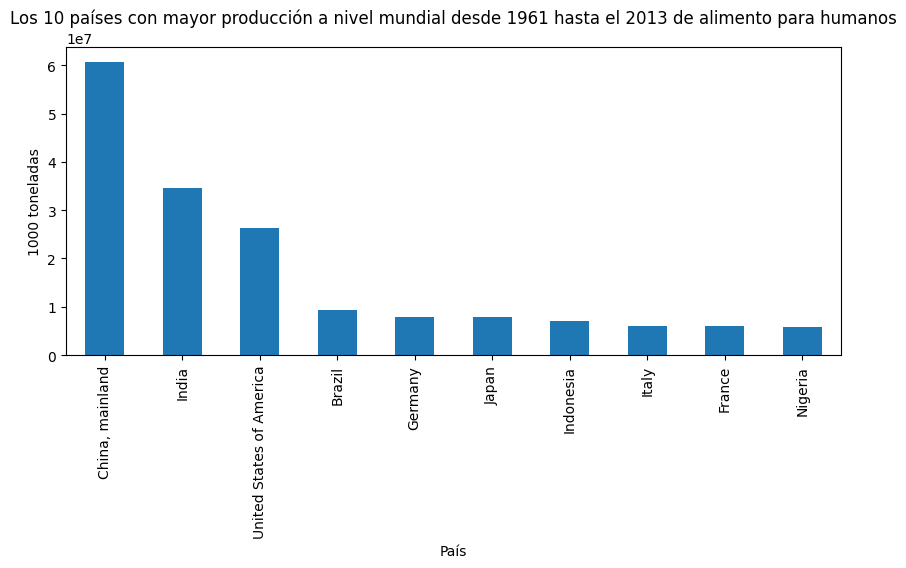

In [29]:
ax = produccion_por_pais_ordenado_food['Total'].head(10).plot.bar(figsize=(10,4), title = "Los 10 países con mayor producción a nivel mundial desde 1961 hasta el 2013 de alimento para humanos")
ax.set_xlabel("País")
ax.set_ylabel("1000 toneladas")



#### ¿Cuáles son los países que producen mayor cantidad de alimento para animales?

In [30]:
# Filtrar filas donde el 'Element' es 'Feed'
food_items = food_data[food_data['Element'] == 'Feed']

# Identificar las columnas de años
columns_years = [col for col in food_data.columns if col.startswith('Y')]

# Sumar las producciones para cada país
produccion_por_pais_feed = food_items.groupby('Area')[columns_years].sum()

# Calcular la producción total sumando a lo largo de los años
produccion_por_pais_feed['Total'] = produccion_por_pais_feed.sum(axis=1)

# Ordenar por la producción total en orden descendente
produccion_por_pais_ordenado_feed = produccion_por_pais_feed.sort_values(by='Total', ascending=False)

# Mostrar los primeros 10 países
top_paises = produccion_por_pais_ordenado_feed.head(10)
print(top_paises)


                             Y1961     Y1962     Y1963     Y1964     Y1965  \
Area                                                                         
China, mainland            55527.0   64160.0   76879.0   86231.0   90948.0   
United States of America  234413.0  228541.0  223570.0  218512.0  248636.0   
Brazil                     54885.0   66116.0   72494.0   69887.0   63808.0   
Germany                    94680.0  105951.0  106370.0  108207.0  109418.0   
Poland                     76684.0   64392.0   74806.0   76820.0   72139.0   
France                     43989.0   47519.0   50519.0   48669.0   50269.0   
Russian Federation             0.0       0.0       0.0       0.0       0.0   
Canada                     22888.0   28153.0   29685.0   28624.0   30452.0   
Spain                      11482.0   12581.0   14846.0   15214.0   16561.0   
India                      15224.0   15864.0   15510.0   15266.0   16154.0   

                             Y1966     Y1967     Y1968     Y196

Realizamos el mismo procedimiento que el anterior, en el que graficamos la distribución de la producción de comida entre los 10 primeros países con mayor producción de alimentos para animales. 

Text(0, 0.5, '1000 toneladas')

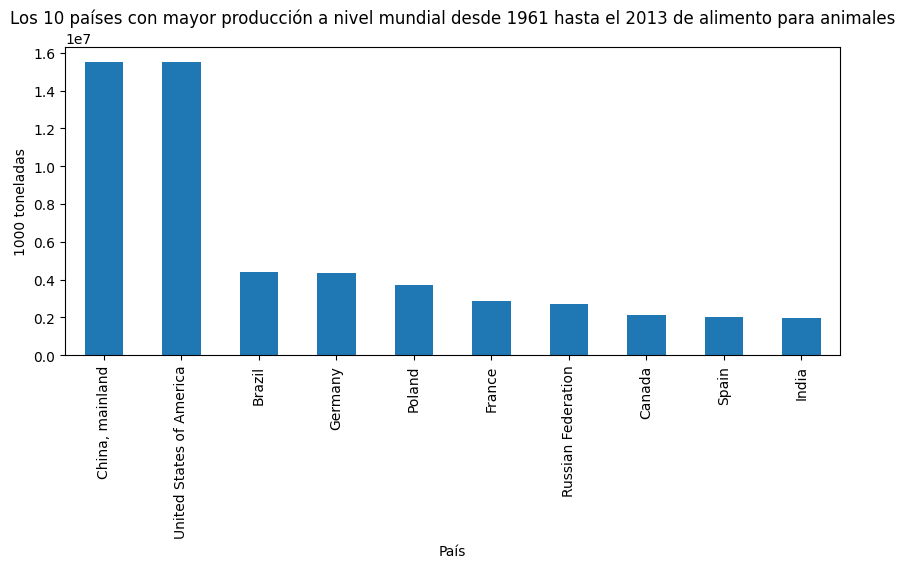

In [28]:
ax = produccion_por_pais_ordenado_feed['Total'].head(10).plot.bar(figsize=(10,4), title = "Los 10 países con mayor producción a nivel mundial desde 1961 hasta el 2013 de alimento para animales")
ax.set_xlabel("País")
ax.set_ylabel("1000 toneladas")

Los países encabezando la lista de producción de comida para animales son China, Estados Unidos y Brasil.
Es interesante observar que dos de los tres países, son los mismos que producen la mayor cantidad de comida para humanos (food)

## Conclusiones

1. Los datos muestran que se produce una mayor cantidad de alimentos para consumo humano
2. En el caso de la producción de comida para humanos, los 3 países que encabezan la lista son China, India y Estados Unidos.
3. Y para la producción de comida animal, los países que producen la mayor cantidad de comida para animales son China, Estados Unidos y Brasil.